# Classify the Images using Tensorflow

Dataset: *Fashion MNIST Dataset* -> Classify images of clothing like shirt, pants and sneakers.

Dataset contains 60000 Training Images and 10000 test Images, 10 Classes, Image Size = 28 x 28 pixels, Label Ids = 0 to 9, Pixel value = 0 to 255.

In [ ]:
# install the tensorflow API
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [ ]:
# Importing Packages:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [ ]:
from tensorflow.python.ops.variables import trainable_variables
#Get the fashion MNIST dataset from keras package - obtain the training set and test set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, trainable_labels), (test_images, test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Initialize the class names:
class_names=['T-shirt/Top', 'Trouser', 'Fullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle Boot']

In [ ]:
# Check the dimension of Training and Test Data:
print(train_images.shape)
print(len(trainable_labels))
print((trainable_labels))

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


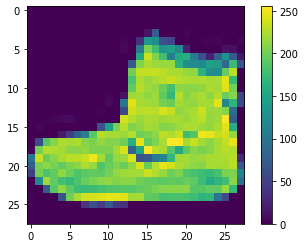

In [ ]:
# Plot the first figure in the train Data:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Normalize the train and test images:
train_images=train_images/255.0
test_images=test_images/255.0

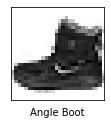

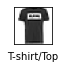

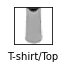

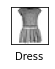

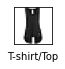

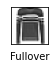

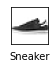

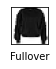

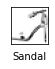

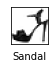

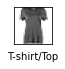

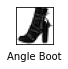

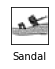

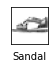

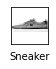

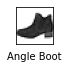

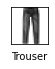

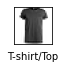

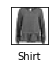

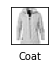

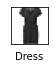

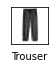

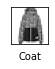

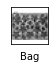

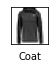

In [10]:
# Plot the sample Train Images:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[trainable_labels[i]])
  plt.show()

In [13]:
# Initialze the Model with 1 Hidden layer (No of Neurons =128)
# Check the Number of Parameters in the model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Set the Parameters for the model:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model for 10 epochs
# if batch_size =32, then the no of batches = 60000/32 =1875
model.fit(train_images, trainable_labels, epochs =10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0822 - accuracy: 0.6612
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6402 - accuracy: 0.7682
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5663 - accuracy: 0.7971
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5235 - accuracy: 0.8145
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4953 - accuracy: 0.8254
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4753 - accuracy: 0.8322
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4598 - accuracy: 0.8379
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4477 - accuracy: 0.8424
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4380 - accuracy: 0.8461
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.430

In [17]:
# Evaluate the model and obtain the accuracy and loss:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('\n Test accuracy:', test_acc)
print('\n Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8340

 Test accuracy: 0.8339999914169312

 Test loss: 0.4577106535434723


In [18]:
# Make predictions on test images
# Look at the probability score obtained on predicting the test_image[0]
prediction=model.predict(test_images)
print(prediction[0])

print('\n Predicted Value: ', np.argmax(prediction[0]))
print('\n Groundtruth Value: ', test_labels[0])

[4.21073281e-07 1.00111585e-07 2.92291179e-06 3.55771772e-06
 7.80856681e-06 1.92999348e-01 8.74299622e-06 2.86771595e-01
 3.84915341e-03 5.16356349e-01]

 Predicted Value:  9

 Groundtruth Value:  9


In [22]:
# Function to plot Images:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("({}),{:2.0f}%, ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label],color=color))

In [23]:
# Function to plot the probability scores for each image:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label=predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

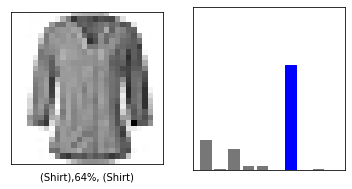

In [24]:
# Take any one test image and make predicted values:
i=4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)
plt.show()

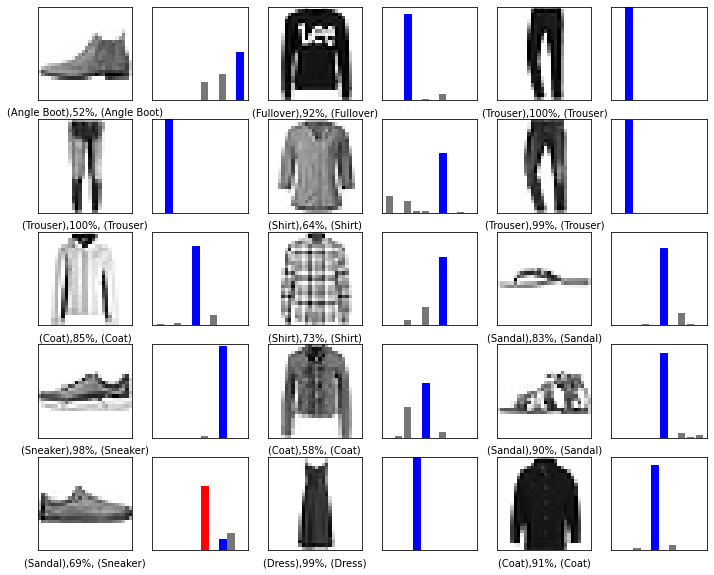

In [26]:
# Visulaize the 15 images with the prediction probaility scores:
num_rows =5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2* i+2)
  plot_value_array(i, prediction, test_labels)

plt.show()